# Projeto de Business Analytics - Linha de Recozimento de Matéria-Prima
## Objetivo: 
- Detectar  váriáveis que influenciam na alta reprova dos lotes de produtos devido a limite de densidade
### Premissas:
- Dados de 3 anos completos (jan/2015 a dez/2017)
- Matéria-prima para produtos alimentícios
- Forno de recozimento de 5 fases
- Variáveis:
    - Cada fase do forno contém 3 sensores de temperaturas
    - Denside de umidade do produto na saída do forno
    - Altura média do produto escoado na esteira
    - Medições a cada minuto
- Controle de Qualidade
    - Amostras a cada hora
    - Limite de densidade 350 a 450 Kg/m3 para aprovação do lote

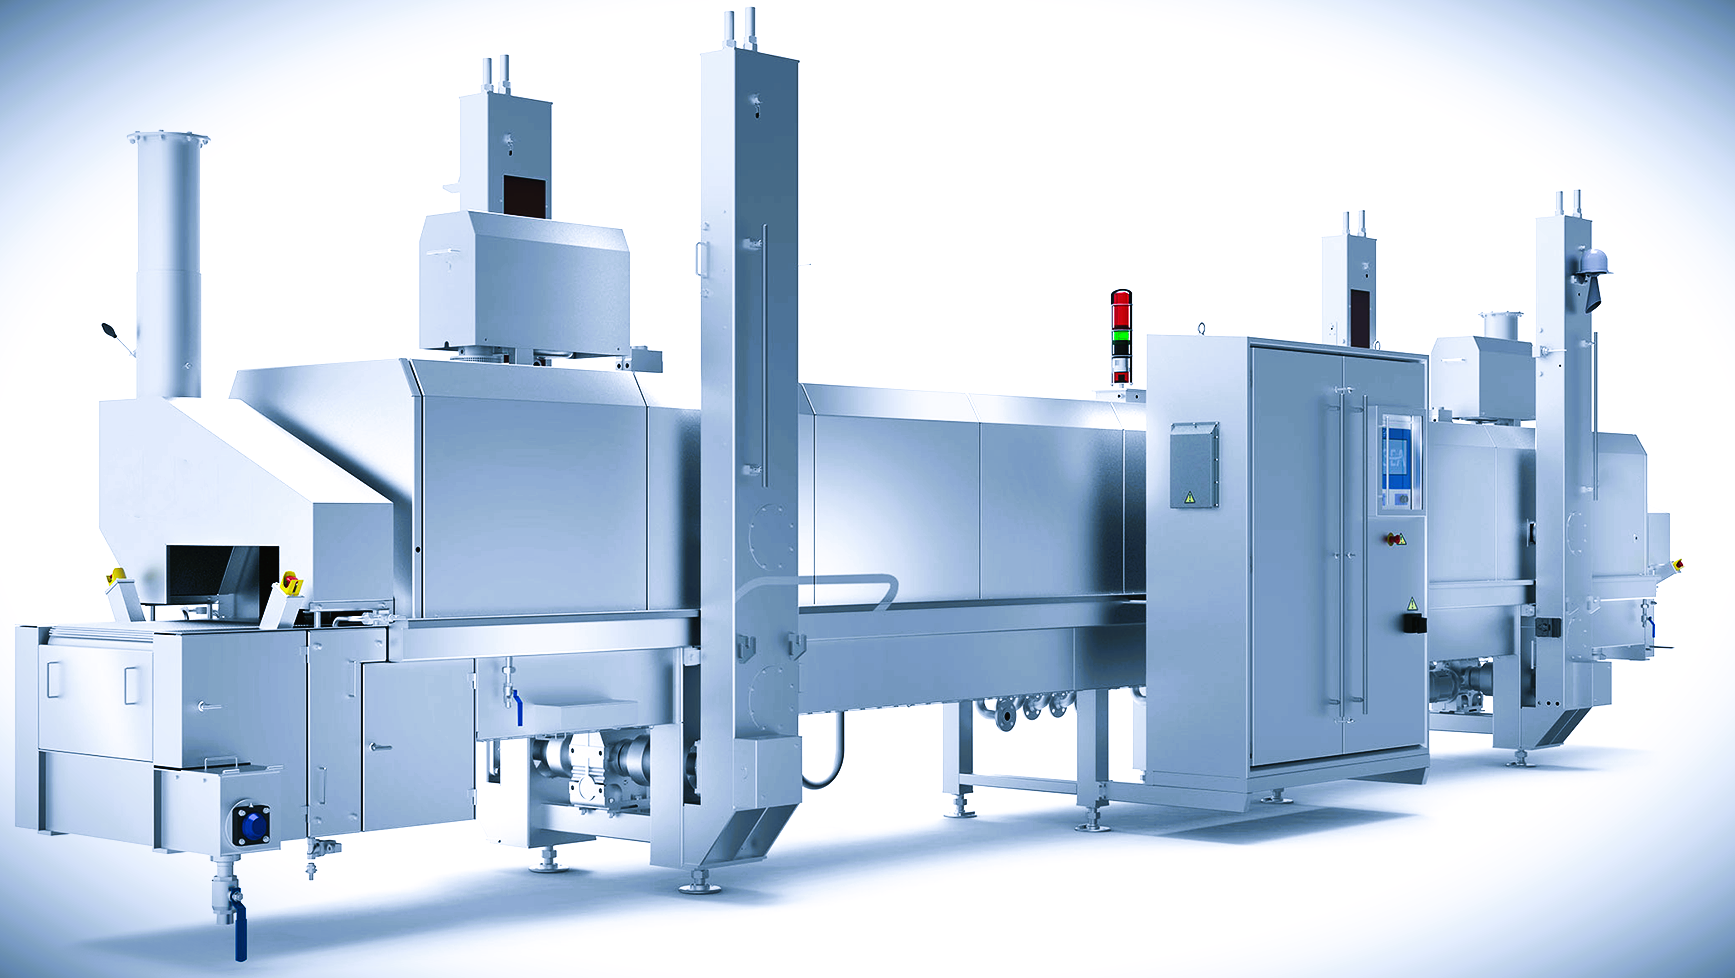

In [1]:
from IPython.display import Image
Image('forno.png')

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.9


In [3]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

# importar os módulos de sistema
import math
import sys, os

# Modulos especiais para tratamento de dados
sys.path.append(os.path.abspath(os.path.join('00')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

Author: Data Science Academy

matplotlib: 3.7.1
plotly    : 5.9.0
numpy     : 1.23.5
seaborn   : 0.12.2
pandas    : 1.5.3
sys       : 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]



### Carregamento dos dados

In [4]:
# Carrega o dataset dados
dados = pd.read_csv('dados/dados.csv', parse_dates=['data'])

In [5]:
# Carrega o dataset qualidade
qualidade = pd.read_csv('dados/qualidade.csv', parse_dates=['data'])

In [6]:
# Quantidade de dados
dados.shape

(1578240, 18)

In [7]:
# Quantidade de dados
qualidade.shape

(26232, 3)

In [8]:
# Amostra
dados

,data,f_1_1,f_1_2,f_1_3,f_2_1,f_2_2,f_2_3,f_3_1,f_3_2,f_3_3,f_4_1,f_4_2,f_4_3,f_5_1,f_5_2,f_5_3,umidade,altura
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578235,2017-12-31 23:55:00,283,268,276,323,358,400,499,478,496,338,356,344,278,286,271,183.38,6.39
1578236,2017-12-31 23:56:00,283,268,276,323,358,403,499,478,496,337,355,344,277,287,271,187.30,6.39
1578237,2017-12-31 23:57:00,283,268,276,323,359,405,499,478,496,336,355,344,277,289,271,184.94,6.39
1578238,2017-12-31 23:58:00,283,268,276,322,359,408,498,478,496,335,355,344,276,290,271,183.30,6.39


In [9]:
# Amostra
qualidade

,data,densidade,aprovado
0,2015-01-04 00:05:00,392,1
1,2015-01-04 01:05:00,384,1
2,2015-01-04 02:05:00,393,1
3,2015-01-04 03:05:00,399,1
4,2015-01-04 04:05:00,400,1
...,...,...,...
26227,2017-12-31 19:05:00,452,0
26228,2017-12-31 20:05:00,445,1
26229,2017-12-31 21:05:00,438,1
26230,2017-12-31 22:05:00,443,1


### Informações
- O dataset 'dados' se refere a coleta de informações dos sensores do equipamento a cada minuto.
- O dataset 'qualidade' são os registros coletados do controle de qualidade de forma amostral a cada hora.

## Análise Exploratória

In [10]:
# Informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578240 entries, 0 to 1578239
Data columns (total 18 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   data     1578240 non-null  datetime64[ns]
 1   f_1_1    1578240 non-null  int64         
 2   f_1_2    1578240 non-null  int64         
 3   f_1_3    1578240 non-null  int64         
 4   f_2_1    1578240 non-null  int64         
 5   f_2_2    1578240 non-null  int64         
 6   f_2_3    1578240 non-null  int64         
 7   f_3_1    1578240 non-null  int64         
 8   f_3_2    1578240 non-null  int64         
 9   f_3_3    1578240 non-null  int64         
 10  f_4_1    1578240 non-null  int64         
 11  f_4_2    1578240 non-null  int64         
 12  f_4_3    1578240 non-null  int64         
 13  f_5_1    1578240 non-null  int64         
 14  f_5_2    1578240 non-null  int64         
 15  f_5_3    1578240 non-null  int64         
 16  umidade  1578240 non-null  float64  

In [11]:
# Estatísticas
dados.describe().round(1)

,f_1_1,f_1_2,f_1_3,f_2_1,f_2_2,f_2_3,f_3_1,f_3_2,f_3_3,f_4_1,f_4_2,f_4_3,f_5_1,f_5_2,f_5_3,umidade,altura
count,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0
mean,250.2,249.9,250.2,349.7,349.8,349.9,500.9,500.6,500.9,349.1,349.2,349.9,249.7,249.4,249.7,174.7,7.5
std,32.2,30.7,30.7,44.6,40.0,37.8,62.9,64.3,60.8,39.2,39.0,39.7,30.8,30.4,30.6,14.4,1.1
min,-198.0,-122.0,-107.0,-703.0,-766.0,-191.0,-607.0,-759.0,-449.0,-514.0,-471.0,-609.0,-89.0,-125.0,-130.0,141.5,3.1
25%,229.0,228.0,229.0,328.0,328.0,328.0,464.0,463.0,464.0,327.0,327.0,328.0,229.0,228.0,229.0,162.5,6.7
50%,250.0,250.0,250.0,350.0,350.0,350.0,502.0,502.0,502.0,349.0,349.0,350.0,249.0,250.0,250.0,174.3,7.5
75%,272.0,272.0,272.0,372.0,372.0,372.0,537.0,537.0,538.0,371.0,371.0,372.0,270.0,271.0,270.0,186.9,8.3
max,724.0,573.0,551.0,1302.0,1179.0,889.0,1587.0,2505.0,1319.0,1177.0,1244.0,944.0,905.0,738.0,624.0,207.7,11.6


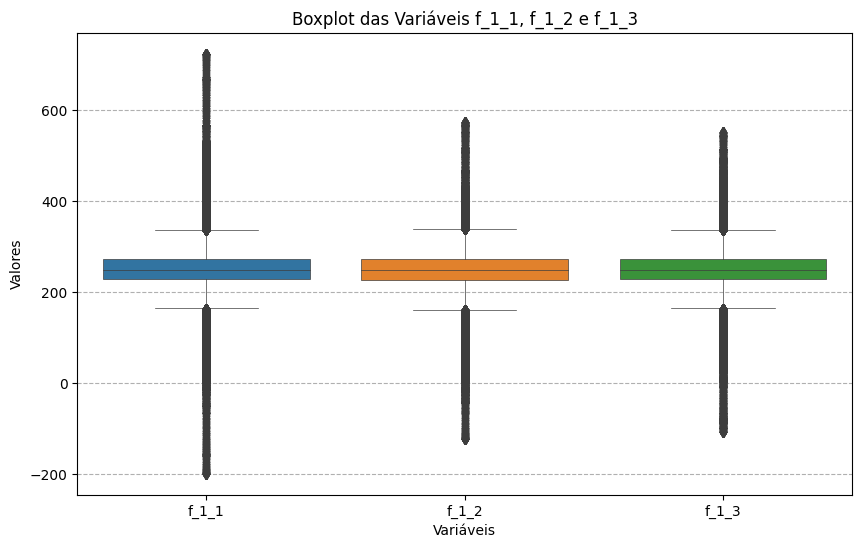

In [12]:
# Criar os boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados[['f_1_1', 'f_1_2', 'f_1_3']], linewidth=0.5)
plt.title('Boxplot das Variáveis f_1_1, f_1_2 e f_1_3')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.grid(axis='y', linestyle='--')
plt.show()

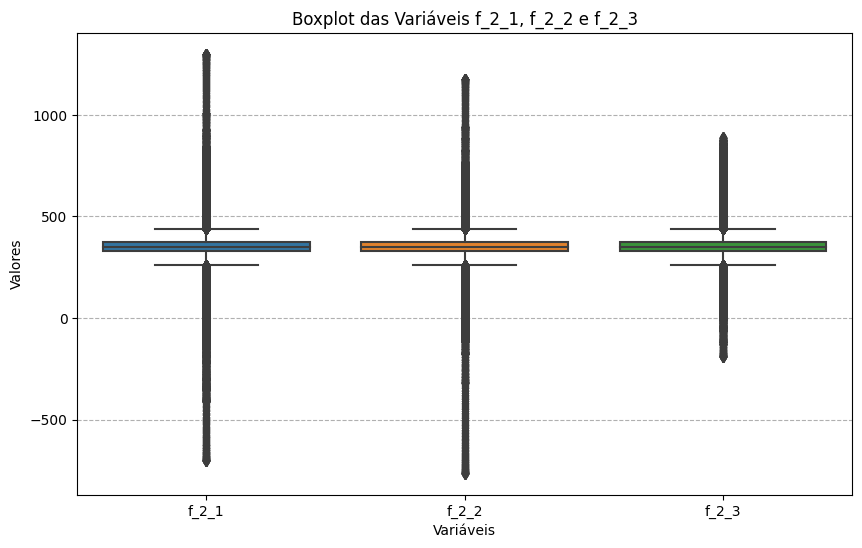

In [13]:
# Criar os boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados[['f_2_1', 'f_2_2', 'f_2_3']])
plt.title('Boxplot das Variáveis f_2_1, f_2_2 e f_2_3')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.grid(axis='y', linestyle='--')
plt.show()

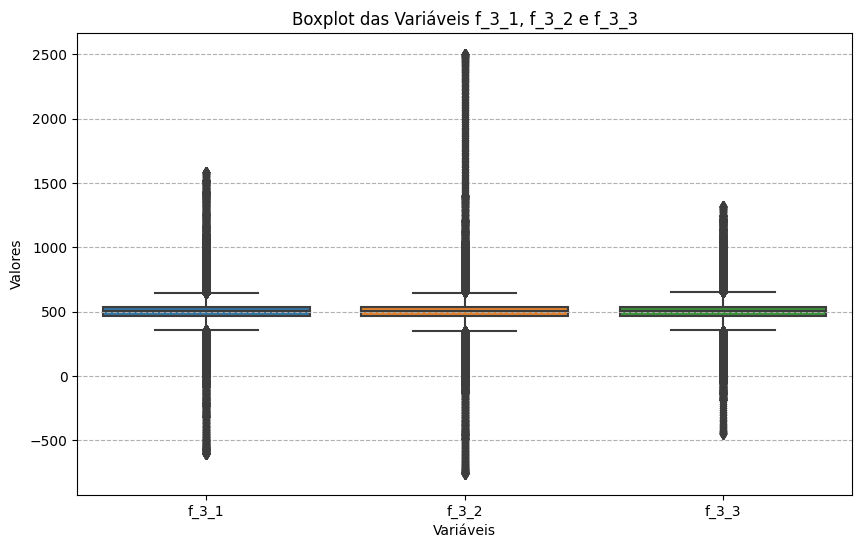

In [14]:
# Criar os boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados[['f_3_1', 'f_3_2', 'f_3_3']])
plt.title('Boxplot das Variáveis f_3_1, f_3_2 e f_3_3')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.grid(axis='y', linestyle='--')
plt.show()

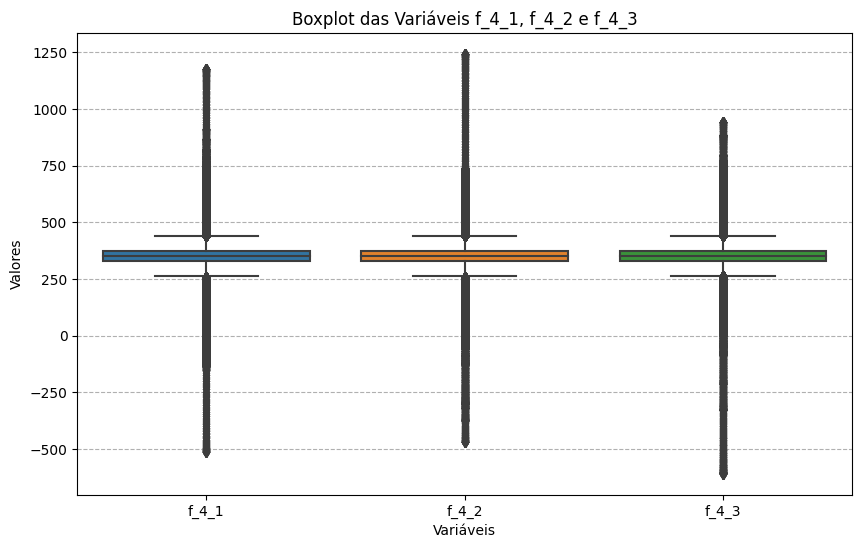

In [15]:
# Criar os boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados[['f_4_1', 'f_4_2', 'f_4_3']])
plt.title('Boxplot das Variáveis f_4_1, f_4_2 e f_4_3')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.grid(axis='y', linestyle='--')
plt.show()

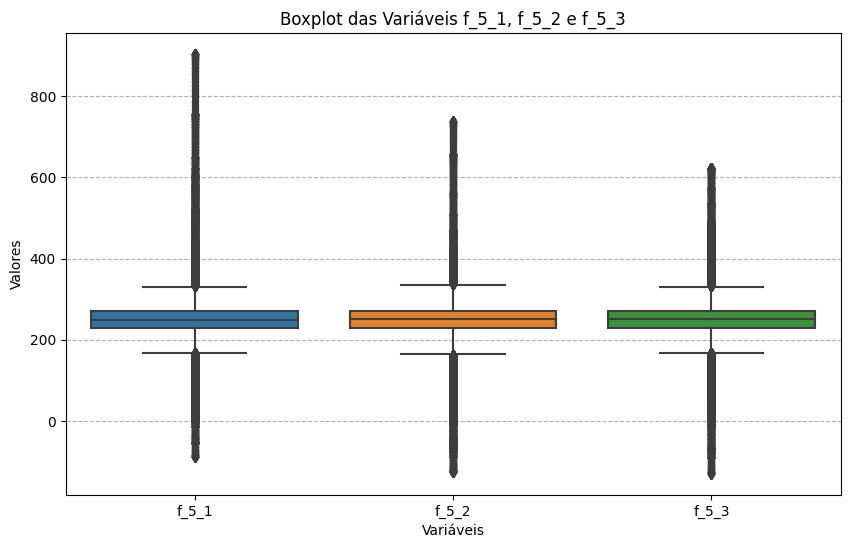

In [16]:
# Criar os boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados[['f_5_1', 'f_5_2', 'f_5_3']])
plt.title('Boxplot das Variáveis f_5_1, f_5_2 e f_5_3')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.grid(axis='y', linestyle='--')
plt.show()

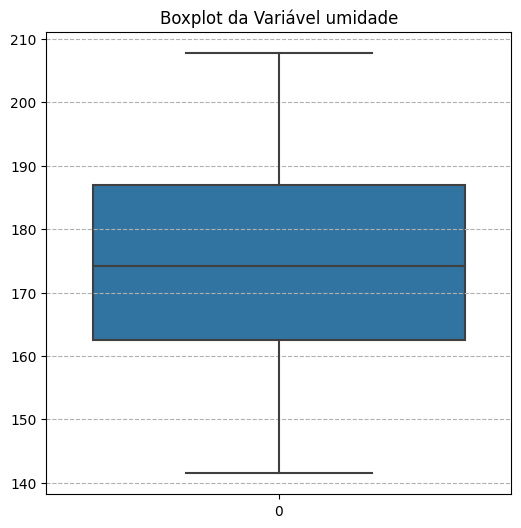

In [17]:
# Criar os boxplots
plt.figure(figsize=(6, 6))
sns.boxplot(data=dados['umidade'])
plt.title('Boxplot da Variável umidade')
plt.grid(axis='y', linestyle='--')
plt.show()

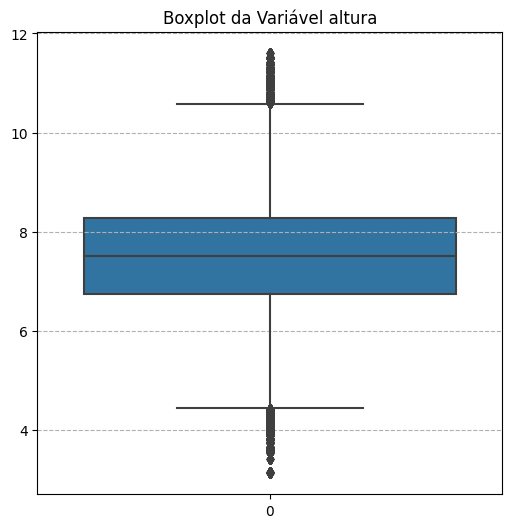

In [18]:
# Criar os boxplots
plt.figure(figsize=(6, 6))
sns.boxplot(data=dados['altura'])
plt.title('Boxplot da Variável altura')
plt.grid(axis='y', linestyle='--')
plt.show()

In [19]:
# Entender a quantidade de outliers por variável

# Definir as colunas a serem consideradas (excluindo 'data' e 'umidade')
colunas = [coluna for coluna in dados.columns if coluna not in ['data', 'umidade']]

# Calcular quantidade total de linhas
total_linhas = len(dados)

# Iterar sobre as colunas
for coluna in colunas:
    # Calcular os limites dos quartis
    q1 = dados[coluna].quantile(0.25)
    q3 = dados[coluna].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    # Verificar outliers
    outliers = dados[(dados[coluna] < lower_limit) | (dados[coluna] > upper_limit)]
    
    # Calcular porcentagem relativa
    porcentagem = len(outliers) / total_linhas * 100
    
    # Imprimir quantidade de outliers e porcentagem relativa
    print(f"A coluna '{coluna}' tem {len(outliers)} outliers, representando {porcentagem:.2f}% das linhas.")

A coluna 'f_1_1' tem 17009 outliers, representando 1.08% das linhas.
A coluna 'f_1_2' tem 13483 outliers, representando 0.85% das linhas.
A coluna 'f_1_3' tem 14298 outliers, representando 0.91% das linhas.
A coluna 'f_2_1' tem 36422 outliers, representando 2.31% das linhas.
A coluna 'f_2_2' tem 31139 outliers, representando 1.97% das linhas.
A coluna 'f_2_3' tem 30696 outliers, representando 1.94% das linhas.
A coluna 'f_3_1' tem 24557 outliers, representando 1.56% das linhas.
A coluna 'f_3_2' tem 22134 outliers, representando 1.40% das linhas.
A coluna 'f_3_3' tem 25386 outliers, representando 1.61% das linhas.
A coluna 'f_4_1' tem 32849 outliers, representando 2.08% das linhas.
A coluna 'f_4_2' tem 30745 outliers, representando 1.95% das linhas.
A coluna 'f_4_3' tem 31467 outliers, representando 1.99% das linhas.
A coluna 'f_5_1' tem 14426 outliers, representando 0.91% das linhas.
A coluna 'f_5_2' tem 12275 outliers, representando 0.78% das linhas.
A coluna 'f_5_3' tem 17183 outlier

In [20]:
# Criar função para substituir todos os outliers pelo valor do limite superior e inferior
def replace_outliers_with_quartiles(df, column):
    # Calcular os quartis
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    # Calcular os limites dos outliers
    iqr = q3 - q1
    lower_limit = q1 - 1.4 * iqr
    upper_limit = q3 + 1.4 * iqr

    # Substituir os outliers pelos quartis
    df[column] = df[column].apply(lambda x: q1 if x < lower_limit or x > upper_limit else x)

In [21]:
# Aplicar a função
colunas_outlier = list(dados.drop(['data', 'umidade'], axis=1).columns)

for coluna in colunas_outlier:
    replace_outliers_with_quartiles(dados, coluna)

In [22]:
# checar se os outliers foram tratados
for coluna in colunas:
    # Calcular os limites dos quartis
    q1 = dados[coluna].quantile(0.25)
    q3 = dados[coluna].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    # Verificar outliers
    outliers = dados[(dados[coluna] < lower_limit) | (dados[coluna] > upper_limit)]
    
    # Calcular porcentagem relativa
    porcentagem = len(outliers) / total_linhas * 100
    
    # Imprimir quantidade de outliers e porcentagem relativa
    print(f"A coluna '{coluna}' tem {len(outliers)} outliers, representando {porcentagem:.2f}% das linhas.")

A coluna 'f_1_1' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_1_2' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_1_3' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_2_1' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_2_2' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_2_3' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_3_1' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_3_2' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_3_3' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_4_1' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_4_2' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_4_3' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_5_1' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_5_2' tem 0 outliers, representando 0.00% das linhas.
A coluna 'f_5_3' tem 0 outliers, representando 0.00% das linhas.
A coluna 'altura' tem 0 o

In [23]:
# Estatísticas
dados.describe().round(1)

,f_1_1,f_1_2,f_1_3,f_2_1,f_2_2,f_2_3,f_3_1,f_3_2,f_3_3,f_4_1,f_4_2,f_4_3,f_5_1,f_5_2,f_5_3,umidade,altura
count,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0,1578240.0
mean,249.9,249.8,250.1,349.5,349.3,349.6,500.0,499.8,500.3,348.7,349.0,349.4,249.3,249.4,249.2,174.7,7.5
std,27.5,27.5,27.4,28.5,28.4,28.3,49.7,49.7,49.8,28.7,28.6,28.6,26.8,27.1,26.7,14.4,1.1
min,169.0,167.0,169.0,267.0,267.0,267.0,362.0,360.0,361.0,266.0,266.0,267.0,172.0,168.0,172.0,141.5,4.6
25%,229.0,228.0,229.0,328.0,328.0,328.0,464.0,463.0,464.0,327.0,327.0,328.0,229.0,228.0,229.0,162.5,6.7
50%,249.0,250.0,250.0,349.0,349.0,349.0,500.0,500.0,500.0,348.0,348.0,349.0,249.0,249.0,249.0,174.3,7.5
75%,271.0,271.0,271.0,371.0,371.0,371.0,536.0,535.0,537.0,370.0,370.0,370.0,270.0,270.0,270.0,186.9,8.3
max,332.0,333.0,332.0,433.0,433.0,433.0,639.0,640.0,641.0,432.0,432.0,433.0,327.0,331.0,327.0,207.7,10.4


In [24]:
# Verificar se tem valores ausentes no dataset
func_calc_percentual_valores_ausentes_coluna(dados)

O dataset tem 18 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [25]:
dados.columns

Index(['data', 'f_1_1', 'f_1_2', 'f_1_3', 'f_2_1', 'f_2_2', 'f_2_3', 'f_3_1',
       'f_3_2', 'f_3_3', 'f_4_1', 'f_4_2', 'f_4_3', 'f_5_1', 'f_5_2', 'f_5_3',
       'umidade', 'altura'],
      dtype='object')

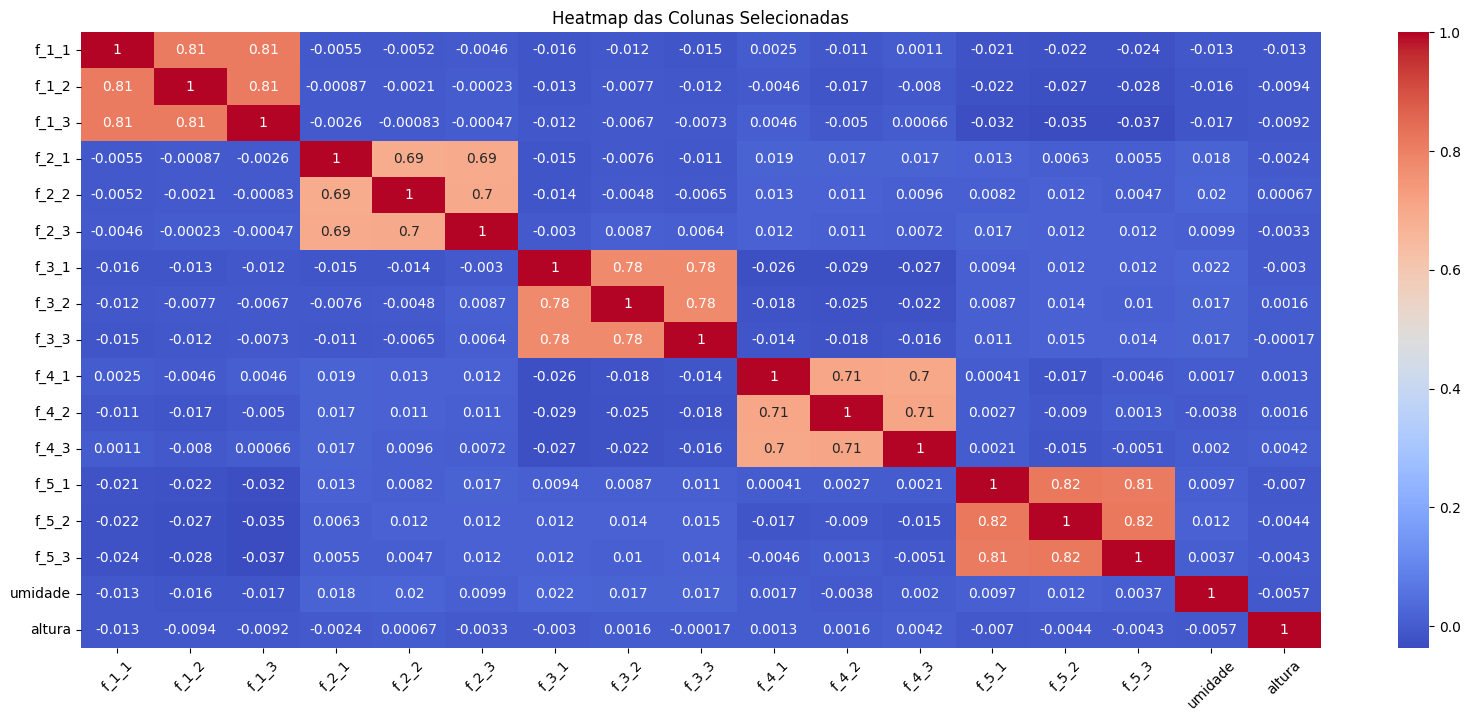

In [26]:
# heatmap das variáveis
colunas_selecionadas = ['f_1_1', 'f_1_2', 'f_1_3', 'f_2_1', 'f_2_2', 'f_2_3', 'f_3_1', 'f_3_2',
                        'f_3_3', 'f_4_1', 'f_4_2', 'f_4_3', 'f_5_1', 'f_5_2', 'f_5_3',
                        'umidade', 'altura']
dados_selecionados = dados[colunas_selecionadas]

plt.figure(figsize=(20, 8))  # Ajustar o tamanho da figura
sns.heatmap(dados_selecionados.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap das Colunas Selecionadas')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Informações
qualidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26232 entries, 0 to 26231
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       26232 non-null  datetime64[ns]
 1   densidade  26232 non-null  int64         
 2   aprovado   26232 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 614.9 KB


In [28]:
# Estatísticas
qualidade['densidade'].describe()

count    26232.000000
mean       403.061223
std         46.103773
min        221.000000
25%        373.000000
50%        408.000000
75%        439.000000
max        505.000000
Name: densidade, dtype: float64

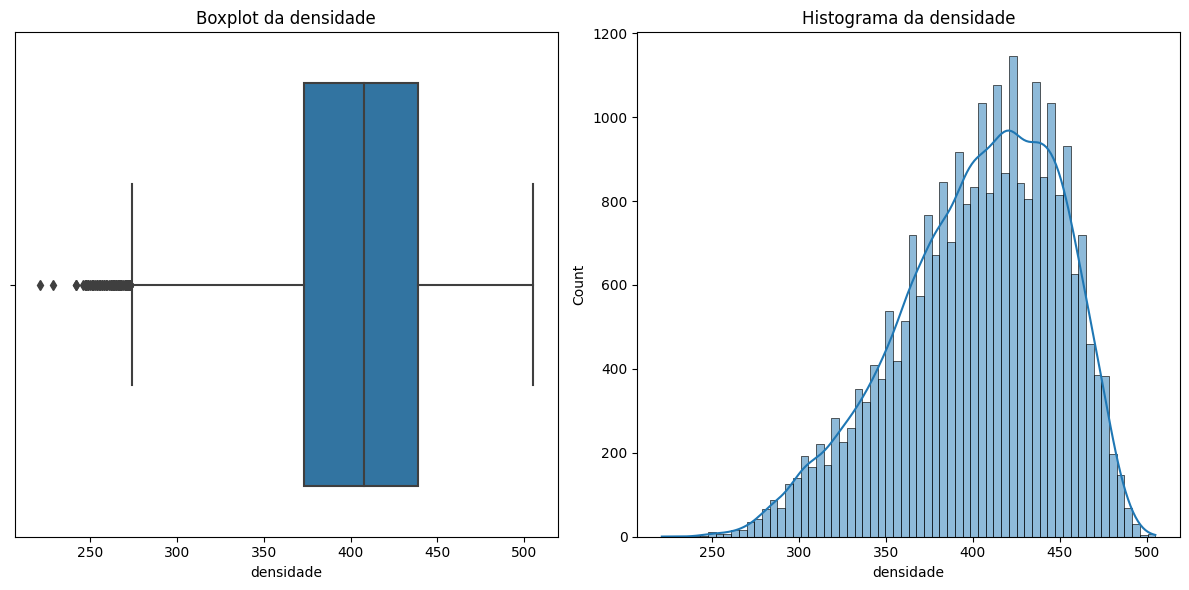

In [29]:
# Variável densidade
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

sns.boxplot(data=qualidade, x='densidade', ax=axes[0])
axes[0].set_title('Boxplot da densidade')

sns.histplot(data=qualidade, x='densidade', ax=axes[1], kde=True)
axes[1].set_title('Histograma da densidade')
plt.tight_layout()
plt.show()

In [30]:
# Quantidade de lotes Produzidos
len(qualidade)

26232

In [31]:
# Estatísticas
qualidade['aprovado'].value_counts()

1    18477
0     7755
Name: aprovado, dtype: int64

In [32]:
# Estatísticas
qualidade['aprovado'].value_counts(normalize=True)

1    0.704369
0    0.295631
Name: aprovado, dtype: float64

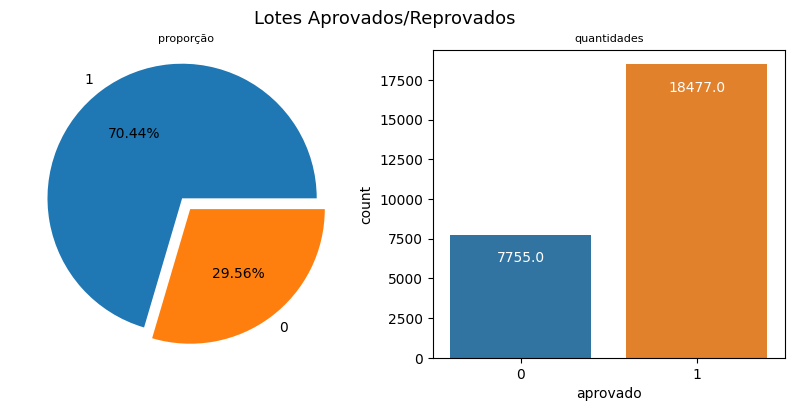

In [33]:
# Quantidade e Proporção dos Lotes Aprovados e Reprovados
plt.figure(figsize = (10,4))
plt.suptitle('Lotes Aprovados/Reprovados', fontsize = 13)
plt.subplot(121)
plt.pie(round(qualidade['aprovado'].value_counts() / len(qualidade) * 100, 2),
        labels = list(qualidade['aprovado'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))
plt.axis("equal")
plt.title("proporção", size = 8)
plt.subplot(122)
ax = sns.countplot(data = qualidade, x = 'aprovado')
plt.title("quantidades", fontsize = 8)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 10)

In [34]:
# Entender a quantidade de outliers por variável

# Definir as colunas a serem consideradas (excluindo 'data' e 'umidade')
colunas_q = [coluna for coluna in qualidade.columns if coluna not in ['data', 'aprovado']]

# Calcular quantidade total de linhas
total_linhas_q = len(qualidade)

# Iterar sobre as colunas
for coluna in colunas_q:
    # Calcular os limites dos quartis
    q1 = qualidade[coluna].quantile(0.25)
    q3 = qualidade[coluna].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    # Verificar outliers
    outliers = qualidade[(qualidade[coluna] < lower_limit) | (qualidade[coluna] > upper_limit)]
    
    # Calcular porcentagem relativa
    porcentagem = len(outliers) / total_linhas_q * 100
    
    # Imprimir quantidade de outliers e porcentagem relativa
    print(f"A coluna '{coluna}' tem {len(outliers)} outliers, representando {porcentagem:.2f}% das linhas.")

A coluna 'densidade' tem 90 outliers, representando 0.34% das linhas.


In [35]:
# Aplicar a função para tratar outliers
colunas_outlier_q = list(qualidade.drop(['data', 'aprovado'], axis=1).columns)

for coluna in colunas_outlier_q:
    replace_outliers_with_quartiles(qualidade, coluna)

In [36]:
# Checar a quantidade de outliers por variável

# Definir as colunas a serem consideradas (excluindo 'data' e 'umidade')
colunas_q = [coluna for coluna in qualidade.columns if coluna not in ['data', 'aprovado']]

# Calcular quantidade total de linhas
total_linhas_q = len(qualidade)

# Iterar sobre as colunas
for coluna in colunas_q:
    # Calcular os limites dos quartis
    q1 = qualidade[coluna].quantile(0.25)
    q3 = qualidade[coluna].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    # Verificar outliers
    outliers = qualidade[(qualidade[coluna] < lower_limit) | (qualidade[coluna] > upper_limit)]
    
    # Calcular porcentagem relativa
    porcentagem = len(outliers) / total_linhas_q * 100
    
    # Imprimir quantidade de outliers e porcentagem relativa
    print(f"A coluna '{coluna}' tem {len(outliers)} outliers, representando {porcentagem:.2f}% das linhas.")

A coluna 'densidade' tem 0 outliers, representando 0.00% das linhas.


In [37]:
# Estatísticas
qualidade['densidade'].describe()

count    26232.000000
mean       403.700900
std         44.936449
min        281.000000
25%        373.000000
50%        408.000000
75%        439.000000
max        505.000000
Name: densidade, dtype: float64

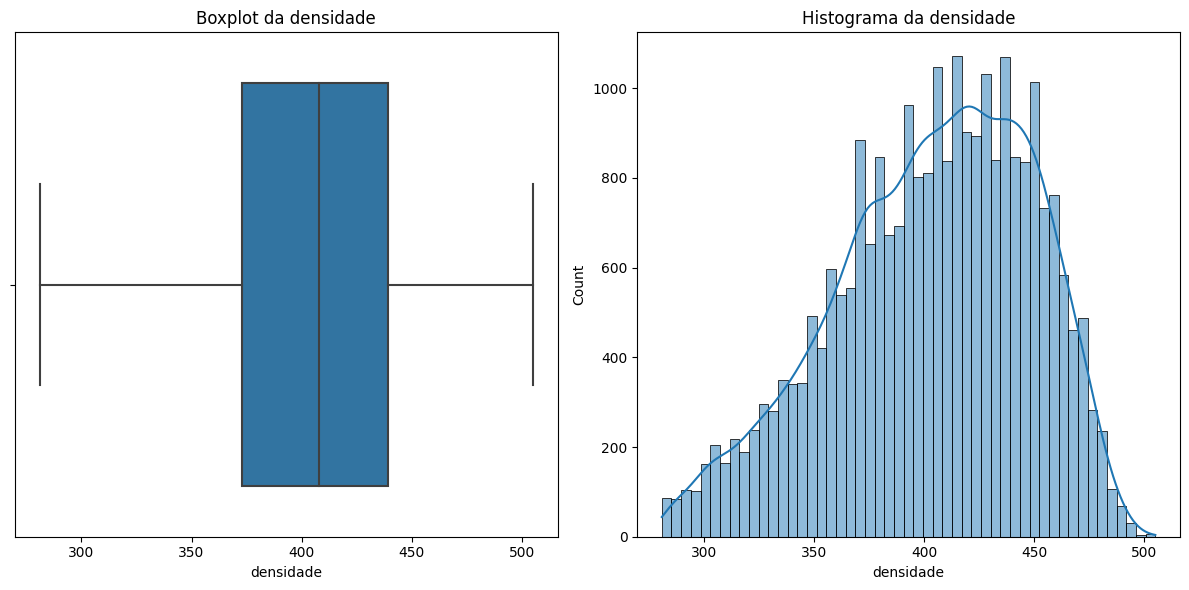

In [38]:
# Variável densidade
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

sns.boxplot(data=qualidade, x='densidade', ax=axes[0])
axes[0].set_title('Boxplot da densidade')

sns.histplot(data=qualidade, x='densidade', ax=axes[1], kde=True)
axes[1].set_title('Histograma da densidade')

plt.tight_layout()
plt.show()

In [39]:
dados.columns

Index(['data', 'f_1_1', 'f_1_2', 'f_1_3', 'f_2_1', 'f_2_2', 'f_2_3', 'f_3_1',
       'f_3_2', 'f_3_3', 'f_4_1', 'f_4_2', 'f_4_3', 'f_5_1', 'f_5_2', 'f_5_3',
       'umidade', 'altura'],
      dtype='object')

In [40]:
# Exluir variáveis com multicolinearidade do dataset dados
dados = dados[['data', 'f_1_1', 'f_2_1','f_3_1', 'f_4_1', 'f_5_1','umidade', 'altura']]

In [41]:
# renomear colunas
dados = dados.rename(columns={'f_1_1': 'fase_1', 'f_2_1': 'fase_2', 'f_3_1': 'fase_3', 'f_4_1': 'fase_4', 'f_5_1': 'fase_5'})

In [42]:
# Criar coluna de data hora
dados['data_hora'] = dados['data'].apply(lambda x: x.strftime("%d-%m-%Y-%H"))

In [43]:
# Amostra dataset dados
dados.head(5)

,data,fase_1,fase_2,fase_3,fase_4,fase_5,umidade,altura,data_hora
0,2015-01-01 00:00:00,212.0,347.0,474.0,346.0,241.0,167.85,9.22,01-01-2015-00
1,2015-01-01 00:01:00,212.0,346.0,475.0,349.0,241.0,162.51,9.22,01-01-2015-00
2,2015-01-01 00:02:00,212.0,345.0,476.0,352.0,242.0,164.99,9.22,01-01-2015-00
3,2015-01-01 00:03:00,213.0,344.0,477.0,355.0,242.0,167.34,9.22,01-01-2015-00
4,2015-01-01 00:04:00,213.0,343.0,478.0,358.0,243.0,163.04,9.22,01-01-2015-00


In [44]:
# Alterar formado de data hora da coluna data
qualidade['data'] = qualidade['data'].apply(lambda x: x.strftime("%d-%m-%Y-%H"))

In [45]:
qualidade = qualidade.rename(columns={'data': 'data_hora'})

In [46]:
# Amostra dataset qualidade
qualidade.head(5)

,data_hora,densidade,aprovado
0,04-01-2015-00,392.0,1
1,04-01-2015-01,384.0,1
2,04-01-2015-02,393.0,1
3,04-01-2015-03,399.0,1
4,04-01-2015-04,400.0,1


## Pré-Processamento

In [47]:
# Unir os 2 datasets
df = dados.merge(qualidade, on='data_hora', how='outer')

In [48]:
# Amostra novo dataset
df

,data,fase_1,fase_2,fase_3,fase_4,fase_5,umidade,altura,data_hora,densidade,aprovado
0,2015-01-01 00:00:00,212.0,347.0,474.0,346.0,241.0,167.85,9.22,01-01-2015-00,NaN,NaN
1,2015-01-01 00:01:00,212.0,346.0,475.0,349.0,241.0,162.51,9.22,01-01-2015-00,NaN,NaN
2,2015-01-01 00:02:00,212.0,345.0,476.0,352.0,242.0,164.99,9.22,01-01-2015-00,NaN,NaN
3,2015-01-01 00:03:00,213.0,344.0,477.0,355.0,242.0,167.34,9.22,01-01-2015-00,NaN,NaN
4,2015-01-01 00:04:00,213.0,343.0,478.0,358.0,243.0,163.04,9.22,01-01-2015-00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1578235,2017-12-31 23:55:00,283.0,323.0,499.0,338.0,278.0,183.38,6.39,31-12-2017-23,437.0,1.0
1578236,2017-12-31 23:56:00,283.0,323.0,499.0,337.0,277.0,187.30,6.39,31-12-2017-23,437.0,1.0
1578237,2017-12-31 23:57:00,283.0,323.0,499.0,336.0,277.0,184.94,6.39,31-12-2017-23,437.0,1.0
1578238,2017-12-31 23:58:00,283.0,322.0,498.0,335.0,276.0,183.30,6.39,31-12-2017-23,437.0,1.0


In [49]:
# Procurar valores ausente
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 11 colunas.
Encontrado: 2 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
densidade,4320,0.27,float64
aprovado,4320,0.27,float64


In [50]:
# Deletar linhas com valores ausentes
drop_rows_with_missing_values(df)

4320 linhas contendo valores ausentes foram descartadas.


In [51]:
# Procurar valores ausente
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 11 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [52]:
df.reset_index(drop=True, inplace=True)

In [53]:
# Deletar coluna data
df = df.drop(['data', 'data_hora'], axis=1)

In [54]:
df['aprovado'] = df['aprovado'].astype("int64")

In [55]:
# Amostra novo dataset
df

,fase_1,fase_2,fase_3,fase_4,fase_5,umidade,altura,densidade,aprovado
0,276.0,323.0,505.0,325.0,231.0,157.74,7.90,392.0,1
1,276.0,322.0,505.0,325.0,231.0,152.62,7.90,392.0,1
2,276.0,322.0,505.0,325.0,231.0,158.29,7.90,392.0,1
3,276.0,322.0,505.0,326.0,231.0,154.12,7.90,392.0,1
4,277.0,322.0,505.0,326.0,231.0,155.45,7.90,392.0,1
...,...,...,...,...,...,...,...,...,...
1573915,283.0,323.0,499.0,338.0,278.0,183.38,6.39,437.0,1
1573916,283.0,323.0,499.0,337.0,277.0,187.30,6.39,437.0,1
1573917,283.0,323.0,499.0,336.0,277.0,184.94,6.39,437.0,1
1573918,283.0,322.0,498.0,335.0,276.0,183.30,6.39,437.0,1


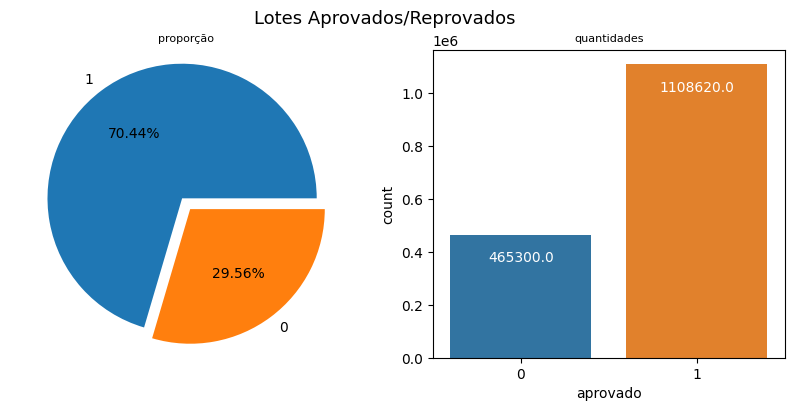

In [56]:
# Quantidade e Proporção dos Lotes Aprovados e Reprovados
plt.figure(figsize = (10,4))
plt.suptitle('Lotes Aprovados/Reprovados', fontsize = 13)
plt.subplot(121)
plt.pie(round(df['aprovado'].value_counts() / len(df) * 100, 2),
        labels = list(df['aprovado'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))
plt.axis("equal")
plt.title("proporção", size = 8)
plt.subplot(122)
ax = sns.countplot(data = df, x = 'aprovado')
plt.title("quantidades", fontsize = 8)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 10)

## Criação de modelo de Machine Learning

In [57]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
import xgboost as xgb

In [58]:
df.sample(5)

,fase_1,fase_2,fase_3,fase_4,fase_5,umidade,altura,densidade,aprovado
120489,261.0,375.0,476.0,375.0,259.0,165.73,6.09,418.0,1
151232,253.0,341.0,559.0,318.0,296.0,179.29,9.17,368.0,1
430132,256.0,335.0,527.0,355.0,228.0,155.44,5.94,361.0,1
1378313,200.0,321.0,601.0,336.0,244.0,196.17,6.68,294.0,0
219737,245.0,317.0,420.0,385.0,223.0,182.71,7.52,453.0,0


In [59]:
# dividir dataset
X = df.iloc[:,:7]
y = df.iloc[:,8].values

In [60]:
# Amostra
X

,fase_1,fase_2,fase_3,fase_4,fase_5,umidade,altura
0,276.0,323.0,505.0,325.0,231.0,157.74,7.90
1,276.0,322.0,505.0,325.0,231.0,152.62,7.90
2,276.0,322.0,505.0,325.0,231.0,158.29,7.90
3,276.0,322.0,505.0,326.0,231.0,154.12,7.90
4,277.0,322.0,505.0,326.0,231.0,155.45,7.90
...,...,...,...,...,...,...,...
1573915,283.0,323.0,499.0,338.0,278.0,183.38,6.39
1573916,283.0,323.0,499.0,337.0,277.0,187.30,6.39
1573917,283.0,323.0,499.0,336.0,277.0,184.94,6.39
1573918,283.0,322.0,498.0,335.0,276.0,183.30,6.39


In [61]:
# Amostra
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
# Dividir base de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1101744, 7), (472176, 7), (1101744,), (472176,))

In [64]:
# Crie um objeto do modelo XGBoost
modelo = xgb.XGBClassifier(max_depth = 10, random_state=0)

In [65]:
# Treine o modelo usando os dados de treinamento
modelo.fit(X_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

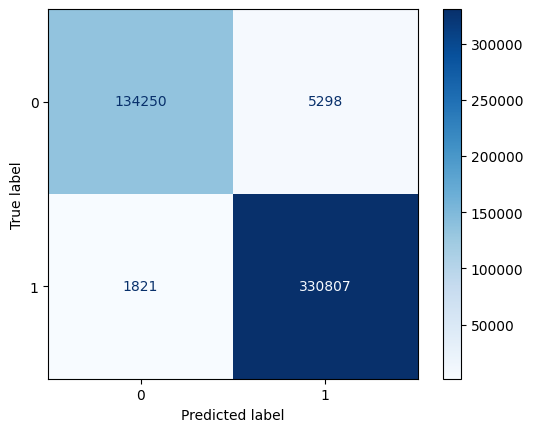

In [66]:
plot_confusion_matrix(modelo, X_teste, y_teste, cmap='Blues');

In [68]:
# Calcule a acurácia comparando os rótulos reais com as previsões
y_pred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, y_pred)
print('Acurácia:', acuracia)

Acurácia: 0.9849229948154925


In [69]:
# Gerar o relatório de classificação
report = classification_report(y_teste, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    139548
           1       0.98      0.99      0.99    332628

    accuracy                           0.98    472176
   macro avg       0.99      0.98      0.98    472176
weighted avg       0.98      0.98      0.98    472176



## Simulações

In [70]:
# dados para simulação
dados_simulacao = [[250, 350, 450, 350, 250, 175, 9],
                   [230, 360, 480, 330, 220, 160, 8],
                   [210, 370, 470, 330, 240, 150, 7],
                   [210, 320, 410, 300, 200, 200, 5],
                   [240, 330, 410, 390, 280, 125, 8]]
colunas = ['fase_1', 'fase_2', 'fase_3', 'fase_4', 'fase_5', 'umidade', 'altura']

simulacao = pd.DataFrame(dados_simulacao, columns=colunas)

In [71]:
# Fazer as previsões para os dados de simulação
previsoes = modelo.predict(simulacao)

In [72]:
# Transformar array previsoes em DataFrame invertendo de linha para coluna
previsoes = pd.DataFrame(previsoes, columns=["aprovado"])

# Concatenar DataFrame simulacao com previsao_df
simulacao_previsoes = pd.concat([simulacao, previsoes], axis=1)

In [73]:
# 0 = reprovado e 1 = aprovado
simulacao_previsoes

,fase_1,fase_2,fase_3,fase_4,fase_5,umidade,altura,aprovado
0,250,350,450,350,250,175,9,1
1,230,360,480,330,220,160,8,1
2,210,370,470,330,240,150,7,1
3,210,320,410,300,200,200,5,1
4,240,330,410,390,280,125,8,0


## Considerações
- Modelo servirá como base de um software controlador das variáveis do equipamento de recozimento
- Controlando as variáveis de forma automatizada, ao mínimo sinal das variáveis, o software fará o ajuste

# Fim